# <b>Avalia o comportamento da Rede</b>

In [1]:
# Importando as dependências
from quantumnet.objects import logger
from simulations import *
from copy import deepcopy
import csv
import matplotlib.pyplot as plt
logger.deactivate()

Parâmetros da Simulação

In [2]:
from params import *
requests = generate_traffic(request_info)
request_proactive = deepcopy(requests)
request_reactive = deepcopy(requests)
request_hybrid = deepcopy(requests)

### <b>Preenchimento Proativo</b>

Não foi possível obter o par EPR fim a fim para a requisição R6F3B60:2-8:0.98:2
Não foi possível obter o par EPR fim a fim para a requisição R6B9D60:7-2:0.52:4
Não foi possível obter o par EPR fim a fim para a requisição R3E5490:4-7:0.61:7
Não foi possível obter o par EPR fim a fim para a requisição R2B78C0:7-4:0.89:3
Não foi possível obter o par EPR fim a fim para a requisição RB492E0:11-4:0.53:8
Não foi possível obter o par EPR fim a fim para a requisição RB4AA80:4-7:0.97:8
Não foi possível obter o par EPR fim a fim para a requisição RB49490:11-1:0.99:3
Não foi possível obter o par EPR fim a fim para a requisição RB4A540:0-9:0.53:6
Não foi possível obter o par EPR fim a fim para a requisição RB490A0:5-3:0.88:2
Não foi possível obter o par EPR fim a fim para a requisição R704860:0-6:0.74:10
Não foi possível obter o par EPR fim a fim para a requisição R704DD0:8-1:0.8:1
Não foi possível obter o par EPR fim a fim para a requisição R704CB0:9-1:0.98:9
Não foi possível obter o par EPR fim a

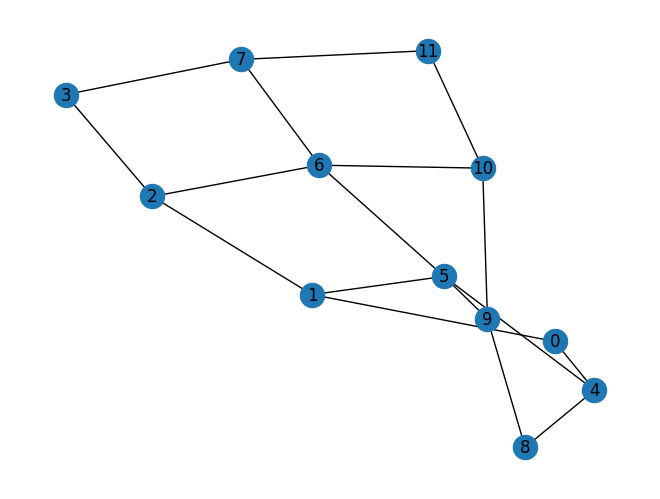

In [3]:
sim = Sim(network_info, controller_info, request_info)
sim.network.draw()
sim.set_file_data('resultados/analise_rede/proativo.csv')
sim.requests = request_proactive
sim.proactive_filling(proactive_params)
sim.proactive_process_requests()
sim.end()

### <b>Preenchimento Reativo</b>

In [4]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
sim.set_file_data('resultados/analise_rede/reativo.csv')
sim.requests = request_reactive
sim.reactive_process_requests()
sim.end()

Não foi possível obter o par EPR fim a fim para a requisição R6F3B60:2-8:0.98:2
Não foi possível obter o par EPR fim a fim para a requisição R3E5490:4-7:0.61:7
Não foi possível obter o par EPR fim a fim para a requisição R2B78C0:7-4:0.89:3
Não foi possível obter o par EPR fim a fim para a requisição RB492E0:11-4:0.53:8
Não foi possível obter o par EPR fim a fim para a requisição RB4AA80:4-7:0.97:8
Não foi possível obter o par EPR fim a fim para a requisição RB49490:11-1:0.99:3
Não foi possível obter o par EPR fim a fim para a requisição R704CB0:9-1:0.98:9
Não foi possível obter o par EPR fim a fim para a requisição R704EC0:10-3:0.92:3
Não foi possível obter o par EPR fim a fim para a requisição R704EF0:2-4:0.91:6
Não foi possível obter o par EPR fim a fim para a requisição R704F50:1-9:0.91:3
Não foi possível obter o par EPR fim a fim para a requisição R705460:9-3:0.92:1


### <b>Preenchimento Híbrido</b>

In [5]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
sim.set_file_data('resultados/analise_rede/hibrido.csv')
sim.requests = request_hybrid
sim.proactive_filling(proactive_params)
sim.reactive_process_requests()
sim.end()

Não foi possível obter o par EPR fim a fim para a requisição R6F3B60:2-8:0.98:2
Não foi possível obter o par EPR fim a fim para a requisição R3E5490:4-7:0.61:7
Não foi possível obter o par EPR fim a fim para a requisição R2B78C0:7-4:0.89:3
Não foi possível obter o par EPR fim a fim para a requisição RB492E0:11-4:0.53:8
Não foi possível obter o par EPR fim a fim para a requisição RB4AA80:4-7:0.97:8
Não foi possível obter o par EPR fim a fim para a requisição RB49490:11-1:0.99:3
Não foi possível obter o par EPR fim a fim para a requisição RB490A0:5-3:0.88:2
Não foi possível obter o par EPR fim a fim para a requisição R704860:0-6:0.74:10
Não foi possível obter o par EPR fim a fim para a requisição R704DD0:8-1:0.8:1
Não foi possível obter o par EPR fim a fim para a requisição R704C80:4-5:0.97:4
Não foi possível obter o par EPR fim a fim para a requisição R704CB0:9-1:0.98:9
Não foi possível obter o par EPR fim a fim para a requisição R704EC0:10-3:0.92:3
Não foi possível obter o par EPR fim 

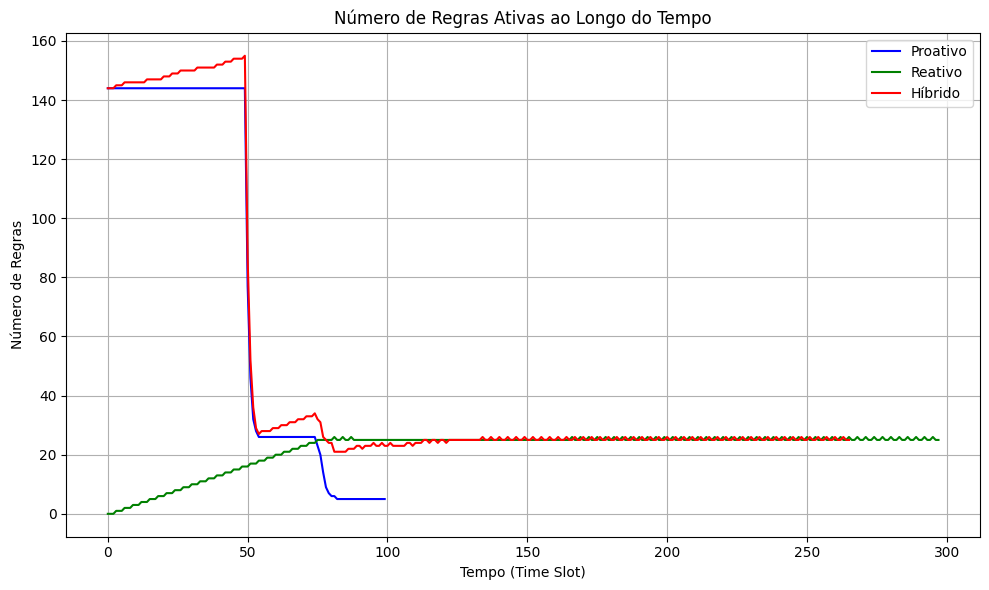

In [6]:
def plot_rules_over_time(filenames, labels, colors):
    """
    Gera um único gráfico com o número de regras ativas ao longo do tempo para diferentes modos.
    """
    plt.figure(figsize=(10, 6))
    
    # Iterar sobre os arquivos e suas configurações (labels e cores)
    for filename, label, color in zip(filenames, labels, colors):
        time_slots = []
        rules_active = []

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                time_slots.append(int(row["time_slot"]))
                rules_active.append(int(row["rules_active"]))

        # Adicionar uma linha ao gráfico
        plt.plot(time_slots, rules_active, linestyle="-", color=color, label=label)
    
    # Configurações do gráfico
    plt.title("Número de Regras Ativas ao Longo do Tempo")
    plt.xlabel("Tempo (Time Slot)")
    plt.ylabel("Número de Regras")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Configuração dos arquivos, rótulos e cores
filenames = [
    'resultados/analise_rede/proativo.csv',
    'resultados/analise_rede/reativo.csv',
    'resultados/analise_rede/hibrido.csv'
]
labels = ['Proativo', 'Reativo', 'Híbrido']
colors = ['b', 'g', 'r']

# Gerar o gráfico
plot_rules_over_time(filenames, labels, colors)
